White Island SO2 fluxes, assumed and calculated heights (ah and ch)
--

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from astropy.coordinates import get_sun
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u

%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
names = ['dt', 'obs', 'err']

In [4]:
urlah1= 'https://fits.geonet.org.nz/observation?typeID=SO2-flux-a&methodID=mdoas-ah&siteID=WI301'
urlah2= 'https://fits.geonet.org.nz/observation?typeID=SO2-flux-a&methodID=mdoas-ah&siteID=WI302'
urlch1= 'https://fits.geonet.org.nz/observation?typeID=SO2-flux-a&methodID=mdoas-ch&siteID=WI301'
urlch2= 'https://fits.geonet.org.nz/observation?typeID=SO2-flux-a&methodID=mdoas-ch&siteID=WI302'

**collect data by site, distinguishing between ah and ch**

In [5]:
#site 301
dfah1 = pd.read_csv(urlah1, names=names, usecols=[0,1], skiprows=1, parse_dates={"Datetime" : ['dt']}, index_col='Datetime')
dfch1 = pd.read_csv(urlch1, names=names, usecols=[0,1], skiprows=1, parse_dates={"Datetime" : ['dt']}, index_col='Datetime')
dfah1.rename(columns={"obs": "ah"}, inplace=True)
dfch1.rename(columns={"obs": "ch"}, inplace=True)
#join so that ah and ch obs at same time on same row
df1 = dfah1.join(dfch1, how='outer')

#site 302
dfah2 = pd.read_csv(urlah2, names=names, usecols=[0,1], skiprows=1, parse_dates={"Datetime" : ['dt']}, index_col='Datetime')
dfch2 = pd.read_csv(urlch2, names=names, usecols=[0,1], skiprows=1, parse_dates={"Datetime" : ['dt']}, index_col='Datetime')
dfah2.rename(columns={"obs": "ah"}, inplace=True)
dfch2.rename(columns={"obs": "ch"}, inplace=True)
df2 = dfah2.join(dfch2, how='outer')

Basic Flux Data, Simple Comparison Between ah and ch
--

**WI301, North East Point**

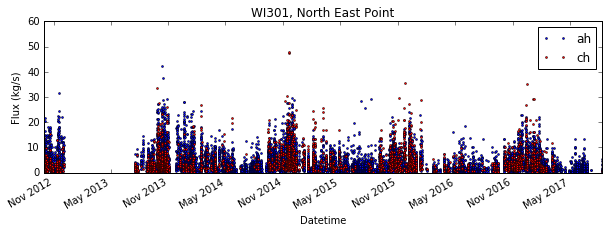

In [6]:
pl = df1['ah'].plot(figsize=(10,3), marker='o', markersize=2, color='blue', linestyle='None', ylim=[0,60])
df1['ch'].plot(marker='o', markersize=2, color='red', linestyle='None', ax=pl)
pl.set_ylabel('Flux (kg/s)')
pl.set_title('WI301, North East Point')
pl.legend(loc='best')

In [7]:
df1.describe()

,ah,ch
count,10572.000000,2021.000000
mean,4.424041,5.176765
std,4.321742,5.312305
min,0.000000,0.087963
25%,1.410000,1.706019
50%,2.990000,3.370000
75%,5.930000,6.650000
max,42.347685,48.010000


In [8]:
float(df1['ah'].count())/float(df1['ch'].count())

5.231073725878278

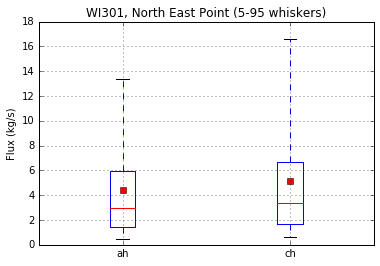

In [9]:
bp = df1.boxplot(whis=[5,95], showmeans=True, showfliers=False)
bp.set_ylabel('Flux (kg/s)')
bp.set_title('WI301, North East Point (5-95 whiskers)')

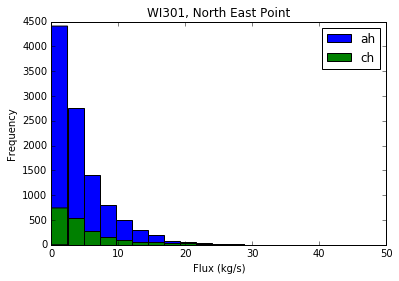

In [10]:
hp = df1.plot.hist(bins=20)
hp.set_xlabel('Flux (kg/s)')
hp.set_title('WI301, North East Point')

**WI302, South Rim**

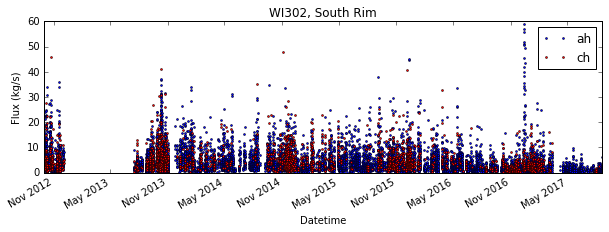

In [11]:
pl = df2['ah'].plot(figsize=(10,3), marker='o', markersize=2, color='blue', linestyle='None', ylim=[0,60])
df2['ch'].plot(marker='o', markersize=2, color='red', linestyle='None', ax=pl)
pl.set_ylabel('Flux (kg/s)')
pl.set_title('WI302, South Rim')
pl.legend(loc='best')

In [12]:
df2.describe()

,ah,ch
count,9427.000000,1684.000000
mean,4.669454,5.715834
std,5.140536,5.271519
min,0.000000,0.062500
25%,1.613657,2.130000
50%,3.150000,4.170000
75%,5.925000,7.501447
max,108.606482,47.740000


In [13]:
float(df2['ah'].count())/float(df2['ch'].count())

5.5979809976247035

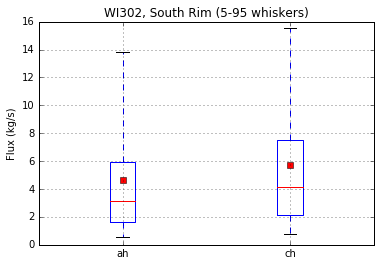

In [14]:
bp = df2.boxplot(whis=[5,95], showmeans=True, showfliers=False)
bp.set_ylabel('Flux (kg/s)')
bp.set_title('WI302, South Rim (5-95 whiskers)')

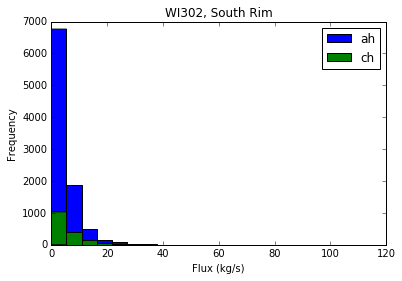

In [15]:
hp = df2.plot.hist(bins=20)
hp.set_xlabel('Flux (kg/s)')
hp.set_title('WI302, South Rim')

Compare Common ah and ch
--

Both ah and ch are uploaded to FITS. For ch values the corresponding ah values are also uploaded, so we can do a direct comparison.

In [16]:
#ratio common measures
df1['rt'] = df1['ch']/df1['ah']
df2['rt'] = df2['ch']/df2['ah']

**Ratio at WI301, North East Point**

In [17]:
df1['rt'].describe()

count    1931.000000
mean        0.959524
std         0.803924
min         0.204724
25%         0.446269
50%         0.688372
75%         1.168465
max         9.714286
Name: rt, dtype: float64

**Ratio at WI302, South Rim**

In [18]:
df2['rt'].describe()

count    1595.000000
mean        1.370974
std         1.198106
min         0.039953
25%         0.662151
50%         0.980903
75%         1.707947
max        14.490566
Name: rt, dtype: float64

**Ratio Plots**

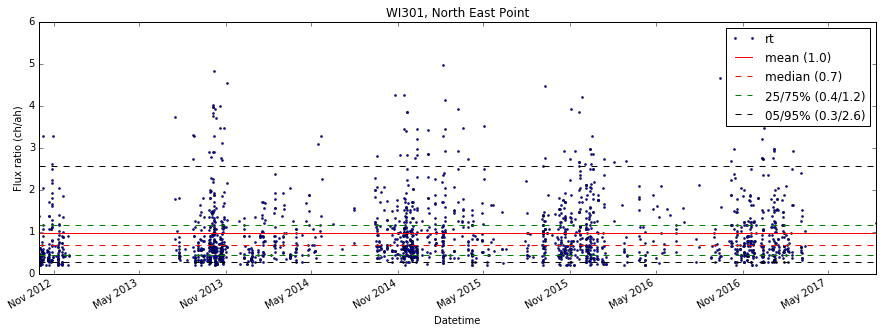

In [19]:
rt = df1['rt'].plot(figsize=(15,5), marker='o', markersize=2, color='blue', linestyle='None', ylim=[0,6])

mean = df1['rt'].mean()
meanstr = '{:.1f}'.format(mean)
rt.axhline(df1['rt'].mean(), color='red', linestyle='solid', linewidth=1, label='mean ('+meanstr+')')

median = df1['rt'].median()
medianstr = '{:.1f}'.format(median)
rt.axhline(df1['rt'].median(), color='red', linestyle='dashed', linewidth=1, label='median ('+medianstr+')')

q25 = df1['rt'].quantile(q=0.25)
q25str = '{:.1f}'.format(q25)
rt.axhline(df1['rt'].quantile(q=0.25), color='green', linestyle='dashed', linewidth=1)
q75 = df1['rt'].quantile(q=0.75)
q75str = '{:.1f}'.format(q75)
rt.axhline(df1['rt'].quantile(q=0.75), color='green', linestyle='dashed', linewidth=1, label='25/75% ('+q25str+'/'+q75str+')')

q05 = df1['rt'].quantile(q=0.05)
q05str = '{:.1f}'.format(q05)
rt.axhline(df1['rt'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1)
q95 = df1['rt'].quantile(q=0.95)
q95str = '{:.1f}'.format(q95)
rt.axhline(df1['rt'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1, label='05/95% ('+q05str+'/'+q95str+')')

rt.set_ylabel('Flux ratio (ch/ah)')
rt.set_title('WI301, North East Point')
rt.legend(loc='best')

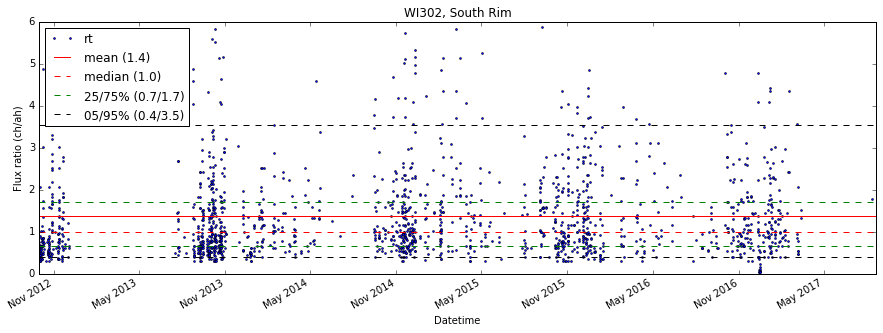

In [20]:
rt = df2['rt'].plot(figsize=(15,5), marker='o', markersize=2, color='blue', linestyle='None', ylim=[0,6])

mean = df2['rt'].mean()
meanstr = '{:.1f}'.format(mean)
rt.axhline(df2['rt'].mean(), color='red', linestyle='solid', linewidth=1, label='mean ('+meanstr+')')

median = df2['rt'].median()
medianstr = '{:.1f}'.format(median)
rt.axhline(df2['rt'].median(), color='red', linestyle='dashed', linewidth=1, label='median ('+medianstr+')')

q25 = df2['rt'].quantile(q=0.25)
q25str = '{:.1f}'.format(q25)
rt.axhline(df2['rt'].quantile(q=0.25), color='green', linestyle='dashed', linewidth=1)
q75 = df2['rt'].quantile(q=0.75)
q75str = '{:.1f}'.format(q75)
rt.axhline(df2['rt'].quantile(q=0.75), color='green', linestyle='dashed', linewidth=1, label='25/75% ('+q25str+'/'+q75str+')')

q05 = df2['rt'].quantile(q=0.05)
q05str = '{:.1f}'.format(q05)
rt.axhline(df2['rt'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1)
q95 = df2['rt'].quantile(q=0.95)
q95str = '{:.1f}'.format(q95)
rt.axhline(df2['rt'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1, label='05/95% ('+q05str+'/'+q95str+')')

rt.set_ylabel('Flux ratio (ch/ah)')
rt.set_title('WI302, South Rim')
rt.legend(loc='best')

Seasonal Effects
--

**Length of day**

http://mathforum.org/library/drmath/view/56478.html

In [21]:
jd = np.arange(1,366,1)
dd = pd.DataFrame(jd, columns=['jd'])

In [22]:
dd['p'] = np.arcsin(.39795*np.cos(.2163108 + 2*np.arctan(.9671396*np.tan(.00860*(dd['jd']-186)))))

In [23]:
lat = -37.52 #white island
dd['daylen'] = 24 - (24/np.pi)*np.arccos((np.sin(0.8333*np.pi/180) + np.sin(lat*np.pi/180)*np.sin(dd['p']))/(np.cos(lat*np.pi/180)*np.cos(dd['p'])))

In [24]:
dd['daylen'].describe()

count    365.000000
mean      12.107092
std        1.786924
min        9.567162
25%       10.378246
50%       12.067633
75%       13.829992
max       14.756626
Name: daylen, dtype: float64

**WI301, North East Point**

In [25]:
df1['jd'] = df1.index.dayofyear
dl1 = df1.merge(dd, on='jd')

In [26]:
dl1['daylenhr'] = dl1['daylen'].astype(int)

In [27]:
dl1.head()

,ah,ch,rt,jd,p,daylen,daylenhr
0,3.898495,NaN,NaN,274,-0.049949,12.43374,12
1,3.920602,1.532407,0.39086,274,-0.049949,12.43374,12
2,0.526157,NaN,NaN,274,-0.049949,12.43374,12
3,1.126505,NaN,NaN,274,-0.049949,12.43374,12
4,0.498032,NaN,NaN,274,-0.049949,12.43374,12


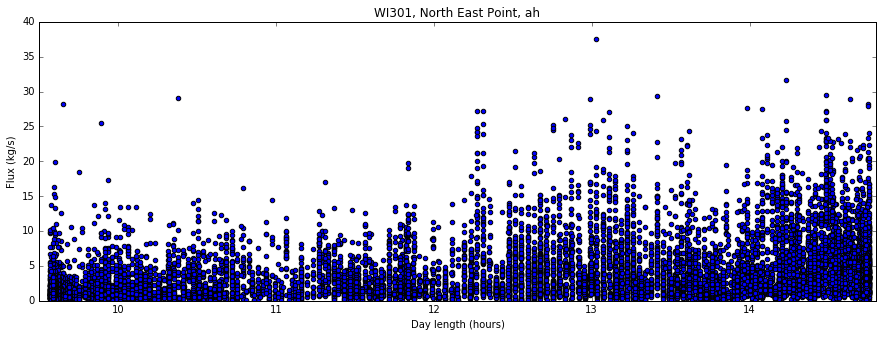

In [28]:
dl = dl1.plot.scatter(figsize=(15,5), x='daylen', y='ah', ylim=[0,40], xlim=[9.5,14.8])
dl.set_ylabel('Flux (kg/s)')
dl.set_xlabel('Day length (hours)')
dl.set_title('WI301, North East Point, ah')

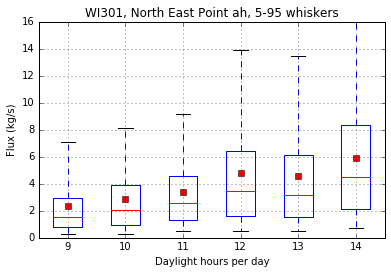

In [29]:
dlb = dl1.boxplot(column='ah', by='daylenhr', showfliers=False, showmeans=True, whis=[5,95])
dlb.set_ylabel('Flux (kg/s)')
dlb.set_xlabel('Daylight hours per day')
dlb.set_title('WI301, North East Point ah, 5-95 whiskers')
dlb.get_figure().suptitle("") #get rid of automatic boxplot sub-title

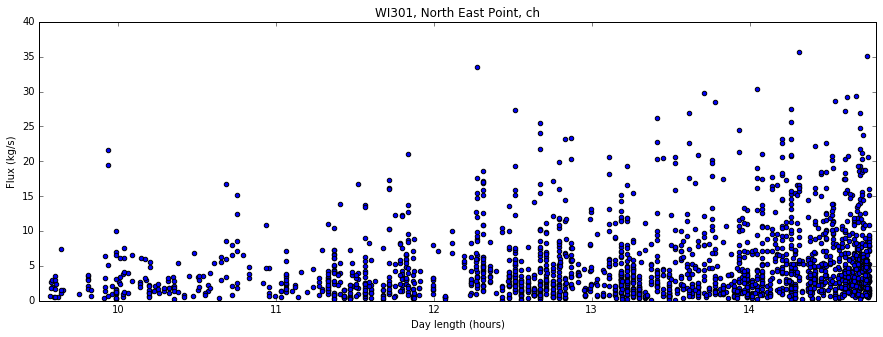

In [30]:
dl = dl1.plot.scatter(figsize=(15,5), x='daylen', y='ch', ylim=[0,40], xlim=[9.5,14.8])
dl.set_ylabel('Flux (kg/s)')
dl.set_xlabel('Day length (hours)')
dl.set_title('WI301, North East Point, ch')

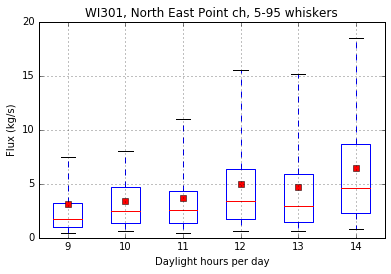

In [31]:
dlb = dl1.boxplot(column='ch', by='daylenhr', showfliers=False, showmeans=True, whis=[5,95])
dlb.set_ylabel('Flux (kg/s)')
dlb.set_xlabel('Daylight hours per day')
dlb.set_title('WI301, North East Point ch, 5-95 whiskers')
dlb.get_figure().suptitle("") #get rid of automatic boxplot sub-title

**WI302, South Rim**

In [32]:
df2['jd'] = df2.index.dayofyear
dl2 = df2.merge(dd, on='jd')

In [33]:
dl2['daylenhr'] = dl2['daylen'].astype(int)

In [34]:
dl2.head()

,ah,ch,rt,jd,p,daylen,daylenhr
0,6.429514,NaN,NaN,274,-0.049949,12.43374,12
1,3.237847,NaN,NaN,274,-0.049949,12.43374,12
2,6.447569,NaN,NaN,274,-0.049949,12.43374,12
3,8.514583,4.950231,0.581383,274,-0.049949,12.43374,12
4,3.777546,9.594907,2.539984,274,-0.049949,12.43374,12


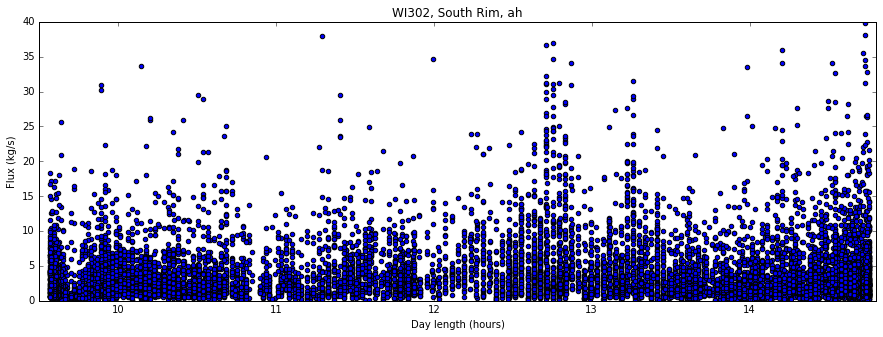

In [35]:
dl = dl2.plot.scatter(figsize=(15,5), x='daylen', y='ah', ylim=[0,40], xlim=[9.5,14.8])
dl.set_ylabel('Flux (kg/s)')
dl.set_xlabel('Day length (hours)')
dl.set_title('WI302, South Rim, ah')

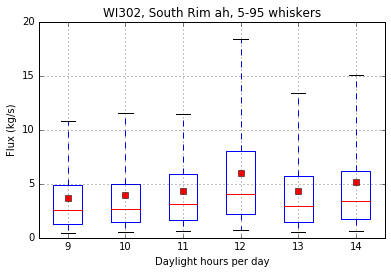

In [36]:
dlb = dl2.boxplot(column='ah', by='daylenhr', showfliers=False, showmeans=True, whis=[5,95])
dlb.set_ylabel('Flux (kg/s)')
dlb.set_xlabel('Daylight hours per day')
dlb.set_title('WI302, South Rim ah, 5-95 whiskers')
dlb.get_figure().suptitle("") #get rid of automatic boxplot sub-title

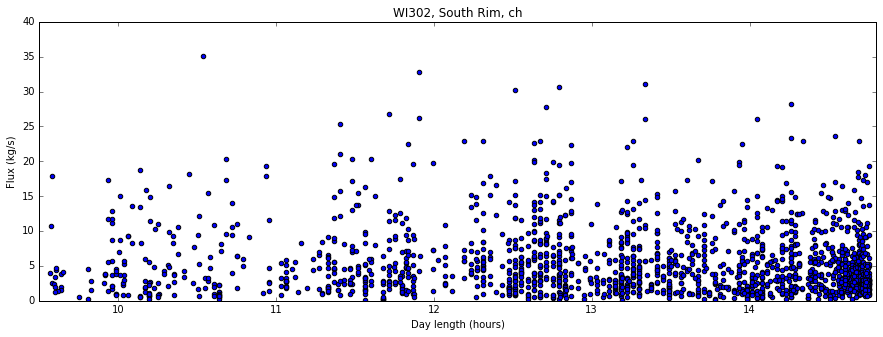

In [37]:
dl = dl2.plot.scatter(figsize=(15,5), x='daylen', y='ch', ylim=[0,40], xlim=[9.5,14.8])
dl.set_ylabel('Flux (kg/s)')
dl.set_xlabel('Day length (hours)')
dl.set_title('WI302, South Rim, ch')

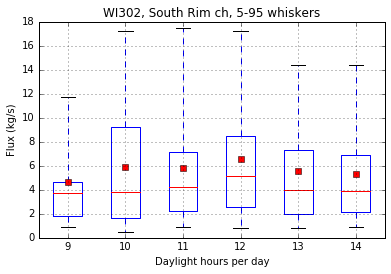

In [38]:
dlb = dl2.boxplot(column='ch', by='daylenhr', showfliers=False, showmeans=True, whis=[5,95])
dlb.set_ylabel('Flux (kg/s)')
dlb.set_xlabel('Daylight hours per day')
dlb.set_title('WI302, South Rim ch, 5-95 whiskers')
dlb.get_figure().suptitle("") #get rid of automatic boxplot sub-title

**Sun Angle**

In [39]:
white_island = EarthLocation(lat=-37.5245*u.deg, lon=177.1893*u.deg, height=0*u.m)

In [40]:
t = df1.index.strftime('%Y-%m-%d %H:%M:%S')
dts = Time(t)
wi = AltAz(obstime=dts, location=white_island)
sunaltaz = get_sun(dts).transform_to(wi)
df1['sun angle'] = sunaltaz.alt.degree

In [41]:
t = df2.index.strftime('%Y-%m-%d %H:%M:%S')
dts = Time(t)
wi = AltAz(obstime=dts, location=white_island)
sunaltaz = get_sun(dts).transform_to(wi)
df2['sun angle'] = sunaltaz.alt.degree

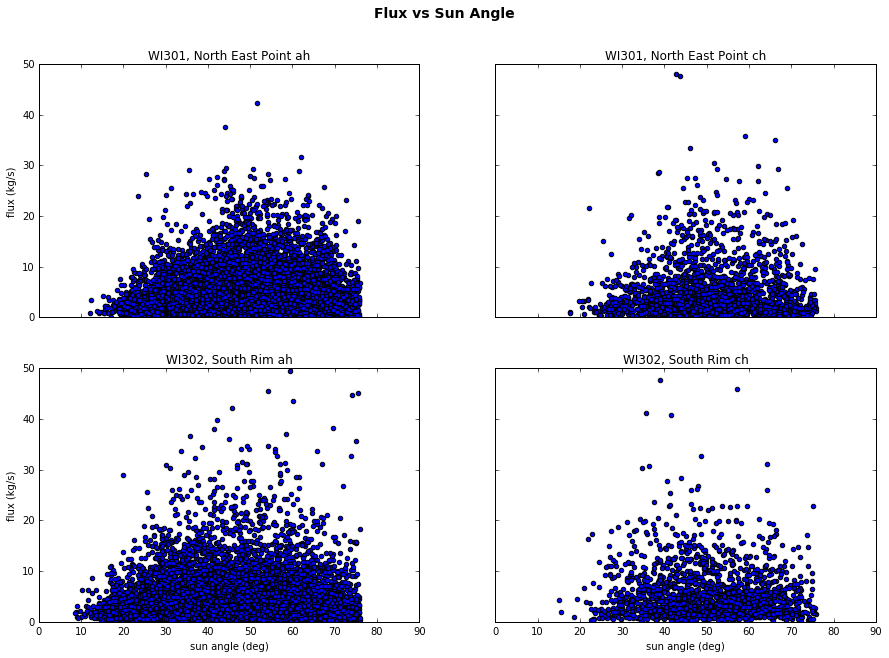

In [42]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,ncols=2, sharey=True, sharex=True, figsize=(15,10))

df1.plot(kind='scatter', x='sun angle', y='ah', ax=ax0)
ax0.set_xlim(0, 90)
ax0.set_ylim(0, 50)
ax0.set_xlabel('sun angle (deg)')
ax0.set_ylabel('flux (kg/s)')
ax0.set_title('WI301, North East Point ah')

df1.plot(kind='scatter', x='sun angle', y='ch', ax=ax1)
ax1.set_xlim(0, 90)
ax1.set_ylim(0, 50)
ax1.set_xlabel('sun angle (deg)')
ax1.set_ylabel('flux (kg/s)')
ax1.set_title('WI301, North East Point ch')

df2.plot(kind='scatter', x='sun angle', y='ah', ax=ax2)
ax2.set_xlim(0, 90)
ax2.set_ylim(0, 50)
ax2.set_xlabel('sun angle (deg)')
ax2.set_ylabel('flux (kg/s)')
ax2.set_title('WI302, South Rim ah')

df2.plot(kind='scatter', x='sun angle', y='ch', ax=ax3)
ax3.set_xlim(0, 90)
ax3.set_ylim(0, 50)
ax3.set_xlabel('sun angle (deg)')
ax3.set_ylabel('flux (kg/s)')
ax3.set_title('WI302, South Rim ch')

fig.suptitle('Flux vs Sun Angle', fontsize=14, fontweight='bold')

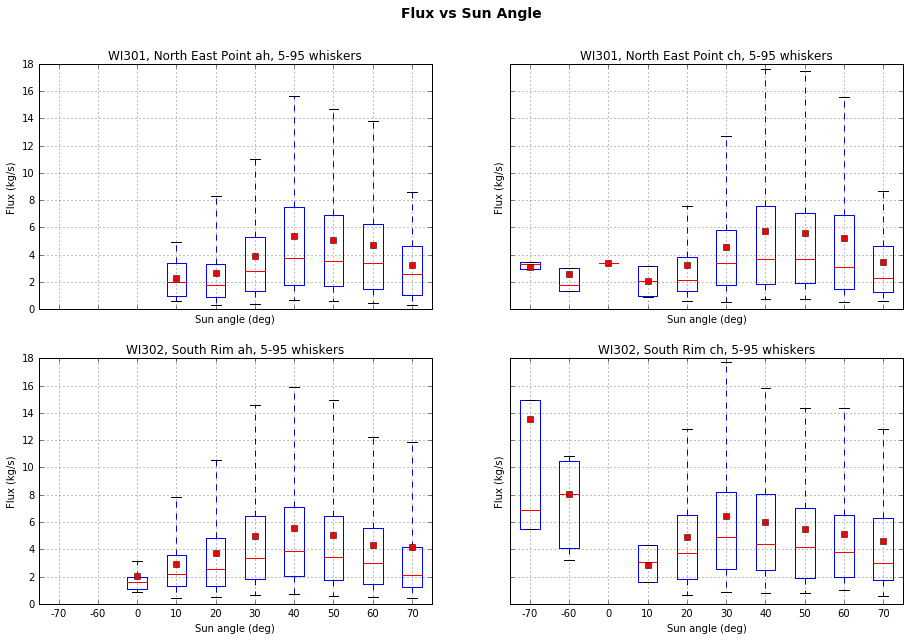

In [43]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,ncols=2, sharey=True, sharex=True, figsize=(15,10))

df1['sun10'] = (((df1['sun angle'].astype(int)) + 9) // 10 * 10) -10
df1.boxplot(column='ah', by='sun10', showfliers=False, showmeans=True, whis=[5,95], ax=ax0)
ax0.set_ylabel('Flux (kg/s)')
ax0.set_xlabel('Sun angle (deg)')
ax0.set_title('WI301, North East Point ah, 5-95 whiskers')
ax0.get_figure().suptitle("") #get rid of automatic boxplot sub-title

df1.boxplot(column='ch', by='sun10', showfliers=False, showmeans=True, whis=[5,95], ax=ax1)
ax1.set_ylabel('Flux (kg/s)')
ax1.set_xlabel('Sun angle (deg)')
ax1.set_title('WI301, North East Point ch, 5-95 whiskers')
ax1.get_figure().suptitle("") #get rid of automatic boxplot sub-title

df2['sun10'] = (((df2['sun angle'].astype(int)) + 9) // 10 * 10) -10
df2.boxplot(column='ah', by='sun10', showfliers=False, showmeans=True, whis=[5,95], ax=ax2)
ax2.set_ylabel('Flux (kg/s)')
ax2.set_xlabel('Sun angle (deg)')
ax2.set_title('WI302, South Rim ah, 5-95 whiskers')
ax2.get_figure().suptitle("") #get rid of automatic boxplot sub-title

df2.boxplot(column='ch', by='sun10', showfliers=False, showmeans=True, whis=[5,95], ax=ax3)
ax3.set_ylabel('Flux (kg/s)')
ax3.set_xlabel('Sun angle (deg)')
ax3.set_title('WI302, South Rim ch, 5-95 whiskers')
ax3.get_figure().suptitle("") #get rid of automatic boxplot sub-title

fig.suptitle('Flux vs Sun Angle', fontsize=14, fontweight='bold')

**Incorrect Times**

NZST was used for the time, though it was labelled as UTC

In [44]:
df1[df1['sun angle'] < 0]

,ah,ch,rt,jd,sun angle,sun10
Datetime,,,,,,
2014-08-01 11:44:03,NaN,2.22,NaN,213,-69.100136,-70
2014-08-05 11:24:51,NaN,3.22,NaN,217,-66.384112,-70
2014-08-06 11:04:13,NaN,3.43,NaN,218,-63.660693,-70
2014-08-07 14:18:48,NaN,1.31,NaN,219,-55.836604,-60
2014-08-11 09:44:21,NaN,3.39,NaN,223,-49.709234,-50
2014-08-12 11:08:39,NaN,3.54,NaN,224,-62.872533,-70
2014-08-13 10:28:44,NaN,1.39,NaN,225,-56.974360,-60
2014-08-13 13:57:34,NaN,2.23,NaN,225,-57.871435,-60
2014-08-14 10:24:18,NaN,5.40,NaN,226,-56.064878,-60


In [45]:
df2[df2['sun angle'] < 0]

,ah,ch,rt,jd,sun angle,sun10
Datetime,,,,,,
2014-08-01 11:51:34,NaN,5.61,NaN,213,-69.620133,-70
2014-08-05 11:35:50,NaN,5.09,NaN,217,-67.462926,-70
2014-08-06 11:20:04,NaN,8.22,NaN,218,-65.625789,-70
2014-08-07 14:16:41,NaN,6.67,NaN,219,-56.199126,-60
2014-08-11 09:47:54,NaN,9.43,NaN,223,-50.353697,-60
2014-08-12 11:13:01,NaN,35.15,NaN,224,-63.393432,-70
2014-08-13 10:18:29,NaN,2.81,NaN,225,-55.311725,-60
2014-08-13 10:33:33,NaN,15.47,NaN,225,-57.731184,-60
2014-08-13 13:56:48,NaN,3.21,NaN,225,-57.989849,-60
